In [6]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


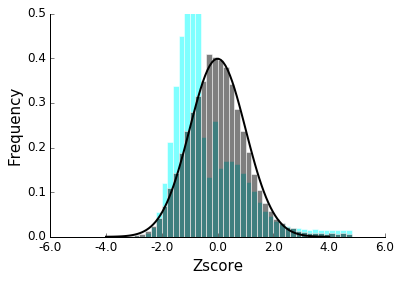

In [10]:
dataset = pd.read_csv(os.path.join(DATAPATH, "constraint", "autosomal_perlocus_estimates.bed"))

fig = plt.figure()
ax = fig.add_subplot(111)
bins = np.arange(-5, 5, 0.2)
ax.hist(dataset[dataset["filter1"]]["zscore_1"], bins=bins, edgecolor="white", color="cyan", normed=True, alpha=0.5);
ax.hist(dataset[~dataset["filter1"]]["zscore_1"], bins=bins, edgecolor="white", color="black", normed=True, alpha=0.5);
ax.set_ylim(bottom=0, top=0.5)

# Fit normal - unfiltered
#mu = np.mean(dataset[~dataset["filter1"]]["zscore_1"])
#std = np.sqrt(np.var(dataset[~dataset["filter1"]]["zscore_1"]))
mu = 0
std = 1
xvals = np.linspace(-4, 4, 100)
p = scipy.stats.norm.pdf(xvals, mu, std)
ax.plot(xvals, p, linewidth=2, color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("Zscore", size=15)
ax.set_ylabel("Frequency", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12);
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure14_ZscoreDistribution.pdf"))